In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as train_test_split

In [3]:
#load data from csv
games = pd.read_csv("games.csv")

In [4]:
#read data

print(games.columns)

print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


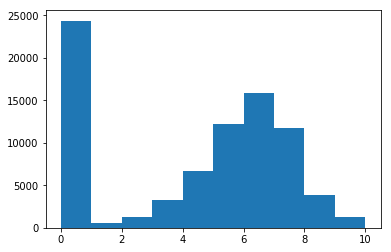

In [7]:
#histogram of avg weight column

plt.hist (games["average_rating"])
plt.show()

In [11]:
#first row of games with 0 rows
print(games[games["average_rating"] == 0].iloc[0])

# greater than 0
print(games[games["average_rating"] > 0].iloc[0])


id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

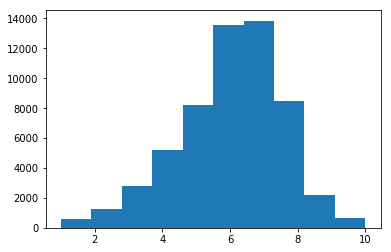

In [14]:
#remove rows without reviews
games = games[games["users_rated"] > 0]

#remove rows missing values
games = games.dropna(axis=0)

#make histogram
plt.hist(games["average_rating"])
plt.show()

In [15]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


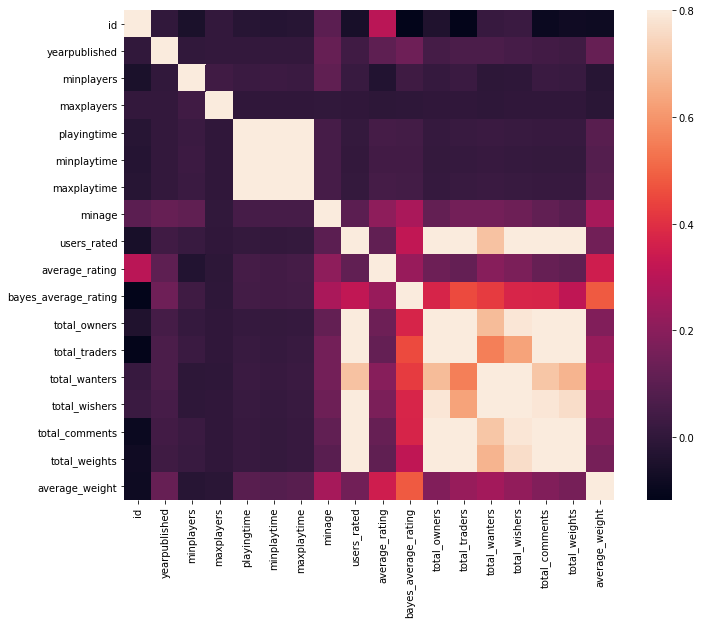

In [18]:
#correlation matrix

corrmat = games.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax=.8, square= True)
plt.show()

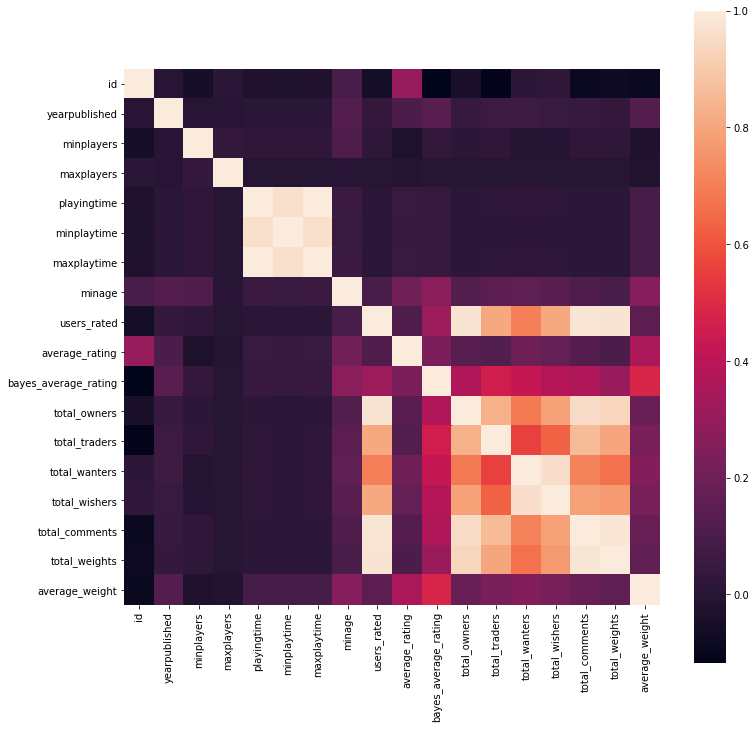

In [19]:
#correlation matrix

corrmat = games.corr()
fig = plt.figure(figsize = (12, 12))

sns.heatmap(corrmat, vmax=1, square= True)
plt.show()

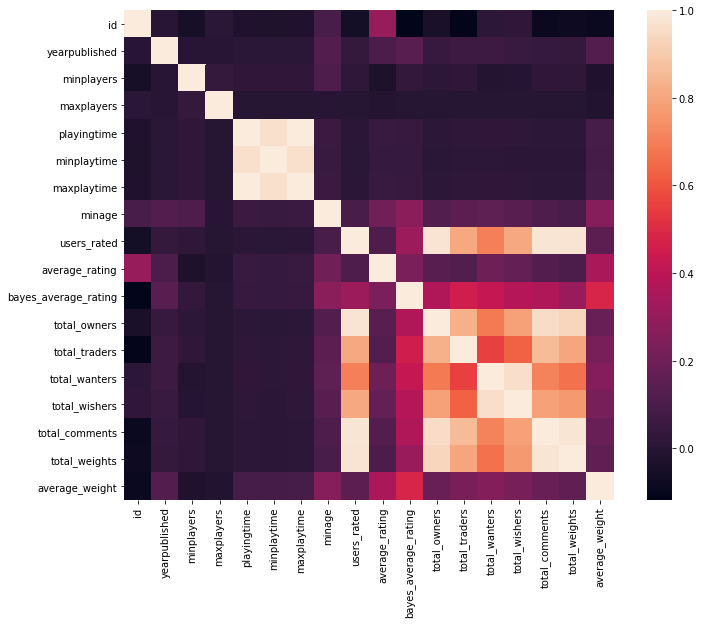

In [20]:
#correlation matrix

corrmat = games.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax=1, square= True)
plt.show()

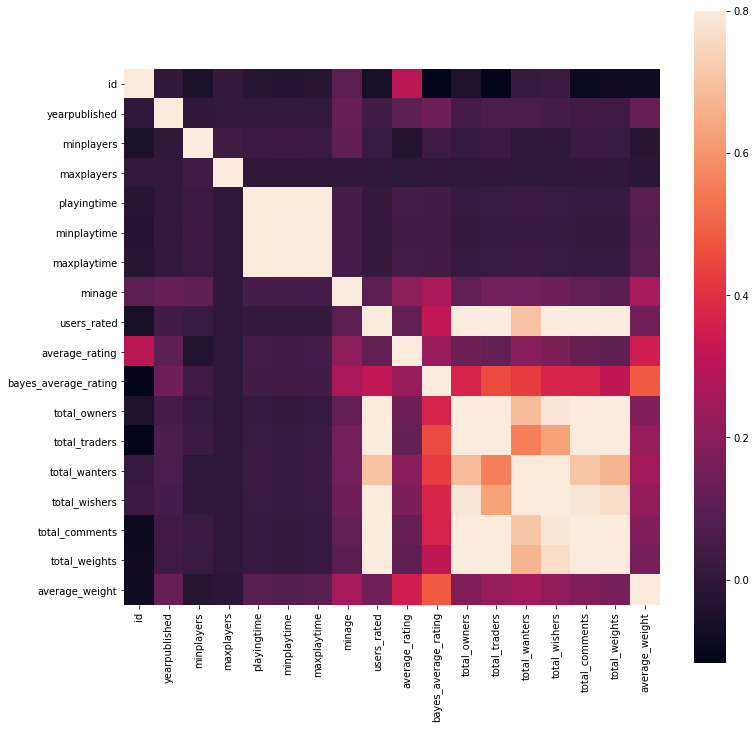

In [21]:
#correlation matrix

corrmat = games.corr()
fig = plt.figure(figsize = (12, 12))

sns.heatmap(corrmat, vmax=.8, square= True)
plt.show()

In [25]:
#get columns from dataset as list
columns = games.columns.tolist()

#filter the columns
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name", "id"]]

target = "average_rating"

print(columns)

['yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']


In [51]:
print(games.shape)

#generate training and test data

#generate training set
train = games.sample(frac = .8, random_state = 1)

#select anything not in the training set as test set
test = games.loc[~games.index.isin(train.index)]

print(train.shape)
print(test.shape)

(56894, 20)
(45515, 20)
(11379, 20)


In [32]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#initialize the model class

LR = LinearRegression()

#fit the model the training data

LR.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
#predict
predictions = LR.predict(test[columns])

#error

mean_squared_error(predictions, test[target])

2.078819032629326

In [36]:
# random forest

from sklearn.ensemble import RandomForestRegressor

#initialize

RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 1)

#fit data

RFR.fit(train[columns], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [37]:
#rfr predicts
predictions = RFR.predict(test[columns])

#rfr error
mean_squared_error(predictions, test[target])

1.4458564605687358

In [41]:
test[columns].iloc[1]

yearpublished      2008.0000
minplayers            1.0000
maxplayers            5.0000
playingtime         200.0000
minplaytime         100.0000
maxplaytime         200.0000
minage               12.0000
users_rated       15774.0000
total_owners      16429.0000
total_traders       205.0000
total_wanters      1343.0000
total_wishers      5149.0000
total_comments     3458.0000
total_weights      1450.0000
average_weight        3.7531
Name: 14, dtype: float64

In [45]:
rating_LR = LR.predict(test[columns].iloc[0].values.reshape(1, -1))

rating_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1, -1))

print(rating_LR)
print(rating_RFR)

print(test[target].iloc[0])


[8.12061283]
[7.91373581]
8.07933
